In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)

In [3]:
renaissance_dataset = pd.read_csv('../data/processed/512M_PAR/renaissance.csv')

In [4]:
renaissance_dataset.columns

Index(['gc_id', 'allocation_size', 'phases', 'parallel_workers',
       'need_full_gc', 'nmethod_epilogue_count', 'nmethod_epilogue_elapsed',
       'srt_live', 'srt_dead', 'srt_total', 'srt_elapsed', 'trt_live',
       'trt_dead', 'trt_total', 'trt_elapsed', 'otyrt_stripe_num',
       'otyrt_stripe_total', 'otyrt_slice_width', 'otyrt_slice_counter',
       'otyrt_dirty_card_counter', 'otyrt_objects_scanned_counter',
       'otyrt_card_increment_counter',
       'otyrt_total_max_card_pointer_being_walked_through', 'otyrt_elapsed',
       'steal_stack_depth_counter', 'steal_elapsed', 'barrier_busy_workers',
       'barrier_elapsed', 'idle_elapsed', 'ref_soft_count', 'ref_soft_elapsed',
       'ref_weak_count', 'ref_weak_elapsed', 'ref_final_count',
       'ref_final_elapsed', 'ref_phantom_count', 'ref_phantom_elapsed',
       'ref_total_elapsed', 'stringtable_size', 'stringtable_processed',
       'stringtable_removed', 'stringtable_elapsed',
       'prune_nmethod_pointer_count', 'prune

In [5]:
renaissance_dataset[['gc_time_clean', 'gc_time']]

,gc_time_clean,gc_time
0,0,49.094
1,0,12.376
2,0,12.248
3,0,14.500
4,0,23.662
...,...,...
6978,0,14.205
6979,0,16.267
6980,0,13.976
6981,0,14.427


In [ ]:
# young_gen_renaissance_dataset = renaissance_dataset.query("young_gen_total_objects > 0")

In [ ]:
# young_gen_renaissance_dataset.to_csv('../data/single_thread_512M/young_gen.csv')

In [ ]:
# renaissance_dataset.iloc[:, 1:][:5]

In [ ]:
# renaissance_dataset.loc[:, ['allocation_size', 'young_gen_total_objects']]

In [6]:
# renaissance_dataset.query('srt_total > 0')

In [8]:
renaissance_dataset[:1]

,gc_id,allocation_size,phases,parallel_workers,need_full_gc,nmethod_epilogue_count,nmethod_epilogue_elapsed,srt_live,srt_dead,srt_total,...,young_gen_heap_capacity,young_gen_heap_used,young_gen_heap_free,old_gen_heap_capacity,old_gen_heap_used,old_gen_heap_free,young_gen_gc_time,old_gen_gc_time,gc_time_clean,gc_time
0,0,4.098,1;3,33,False,479.0,0.388,52.0,0.0,52.0,...,156762.112,134742.016,22020.096,358088.704,0.0,358088.704,48.5072,0.0,0,49.094


In [ ]:
renaissance_dataset['gc_time'].plot(x='gc_id', figsize=(12, 10), linewidth=2.5)
plt.xlabel("GC ID", labelpad=15)
plt.ylabel("GC Time", labelpad=15)
plt.title("Renaissance", y=1.02, fontsize=22)

In [ ]:
renaissance_dataset.plot.scatter(
    x='srt_total',
    y='gc_time',
    figsize=(10, 10), 
    color='r')
plt.xlabel("srt_live", labelpad=15)
plt.ylabel("GC Time", labelpad=15)
plt.title("Renaissance", y=1.02, fontsize=22)

In [ ]:
# renaissance_dataset[[
# #     'allocation_size',                  
# #     'young_gen_total_objects',
# #     'stringtable_size',
# #     'prune_nmethod_time',
# #     'stringtable_time',
# #     'young_gen_gc_time',
# #     'young_gen_heap_used',
# #     'young_gen_heap_free',
#     'gc_id',
# #     'allocation_size',
# #     'otyrt_distance',
#     'otyrt_slice_counter',
#     'otyrt_dirty_card_counter',
#     'otyrt_objects_scanned_counter',
#     'otyrt_total_max_card_pointer_being_walked_through',
#     'otyrt_card_increment_counter',
#     'otyrt_time',
# #     'gc_time_clean',
# #     'gc_time',
# ]][:100]

In [ ]:
#     'otyrt_distance',
#     'otyrt_slice_counter',
#     'otyrt_dirty_card_counter',
#     'otyrt_objects_scanned_counter',
#     'otyrt_total_max_card_pointer_being_walked_through',
#     'otyrt_time',
dat = renaissance_dataset[renaissance_dataset['otyrt_time'] < 1500]



dat.plot.scatter(
    x='otyrt_distance',
    y='otyrt_time',
    figsize=(5, 5), 
    color='r')

dat.plot.scatter(
    x='otyrt_slice_counter',
    y='otyrt_time',
    figsize=(5, 5), 
    color='r')

dat.plot.scatter(
    x='otyrt_dirty_card_counter',
    y='otyrt_time',
    figsize=(5, 5), 
    color='r')

dat.plot.scatter(
    x='otyrt_objects_scanned_counter',
    y='otyrt_time',
    figsize=(5, 5), 
    color='r')

dat.plot.scatter(
    x='otyrt_card_increment_counter',
    y='otyrt_time',
    figsize=(5, 5), 
#     linewidth=2.5,
    color='g')

#     linewidth=2.5)
dat.plot.scatter(
    x='otyrt_total_max_card_pointer_being_walked_through',
    y='otyrt_time',
    figsize=(5, 5), 
#     linewidth=2.5,
    color='g')

# plt.xlabel("OTYRT distance", labelpad=15)
# plt.ylabel("OTYRT Time", labelpad=15)
# plt.title("Renaissance", y=1.02, fontsize=22)

In [ ]:
renaissance_dataset['gc_time'][renaissance_dataset['gc_time_clean'] < 500].plot(figsize=(12, 10), linewidth=2.5)
plt.xlabel("GC ID", labelpad=15)
plt.ylabel("GC Time", labelpad=15)
plt.title("Renaissance", y=1.02, fontsize=22)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y = pd.DataFrame(np.loadtxt('../results/512M_PAR_GOOD/inference/y.txt'), columns=['time'])

In [ ]:
y

In [ ]:
y_pred = pd.DataFrame(np.loadtxt('../results/512M_PAR_GOOD/inference/y_pred.txt'), columns=['pred'])

In [ ]:
y_pred

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(y.index, y.values)
plt.scatter(y_pred.index, y_pred.values)
plt.xlabel("index")
plt.ylabel("value")
plt.show()

In [ ]:
# y.reset_index().plot.scatter(x = 'index', y = 0)

In [10]:
dacapo_dataset = pd.read_csv('../data/processed/PAR/dacapo.csv')

In [11]:
dacapo_dataset

,gc_id,allocation_size,phases,parallel_workers,need_full_gc,nmethod_epilogue_count,nmethod_epilogue_elapsed,srt_live,srt_dead,srt_total,...,young_gen_heap_capacity,young_gen_heap_used,young_gen_heap_free,old_gen_heap_capacity,old_gen_heap_used,old_gen_heap_free,young_gen_gc_time,old_gen_gc_time,gc_time_clean,gc_time
0,0,0.004,1;3,33,False,1139.0,0.526,34.0,3.0,37.0,...,1252524.032,1073741.824,178782.208,2863661.056,0.000,2863661.056,19.6087,0.0,0,20.156
1,1,0.004,1;3,33,False,983.0,0.773,0.0,0.0,0.0,...,1252524.032,1078400.720,174123.312,2863661.056,8.192,2863652.864,12.4501,0.0,0,13.140
2,2,0.018,1;3,33,False,956.0,1.000,0.0,0.0,0.0,...,1252524.032,1076315.920,176208.112,2863661.056,16.384,2863644.672,12.7394,0.0,0,13.413
3,3,0.004,1;3,33,False,1011.0,0.912,0.0,0.0,0.0,...,1252524.032,1076289.720,176234.312,2863661.056,24.576,2863636.480,29.5647,0.0,0,30.257
4,4,0.004,1;3,33,False,1063.0,0.704,0.0,0.0,0.0,...,1252524.032,1076133.288,176390.744,2863661.056,32.768,2863628.288,15.8388,0.0,0,16.494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,3063,0.006,1;3,33,False,33.0,0.133,0.0,37.0,37.0,...,1409810.432,1406620.000,3190.432,2863661.056,1583637.328,1280023.728,14.2167,0.0,0,14.688
1545,3064,2.050,1;3,33,False,25.0,0.077,0.0,0.0,0.0,...,1409286.144,1406783.504,2502.640,2863661.056,1583858.512,1279802.544,14.6206,0.0,0,15.155
1546,3065,0.006,1;3,33,False,33.0,0.044,0.0,0.0,0.0,...,1409810.432,1407045.632,2764.800,2863661.056,1584071.504,1279589.552,14.6624,0.0,0,15.217
1547,3066,0.258,1;3,33,False,38.0,0.064,0.0,54.0,54.0,...,1409810.432,1407242.480,2567.952,2863661.056,1584309.072,1279351.984,14.8153,0.0,0,15.268


In [18]:
y = pd.DataFrame(np.loadtxt('../results/4G/inference/y_1.txt'), columns=['time'])

In [21]:
y

,time
0,20.156
1,13.140
2,13.413
3,30.257
4,16.494
...,...
1541,14.688
1542,15.155
1543,15.217
1544,15.268


In [19]:
y_pred = pd.DataFrame(np.loadtxt('../results/4G/inference/y_pred_1.txt'), columns=['time'])

In [22]:
y_pred

,time
0,32.281222
1,29.061302
2,29.327422
3,28.859606
4,28.906772
...,...
1541,47.527587
1542,46.506637
1543,46.474564
1544,46.084389


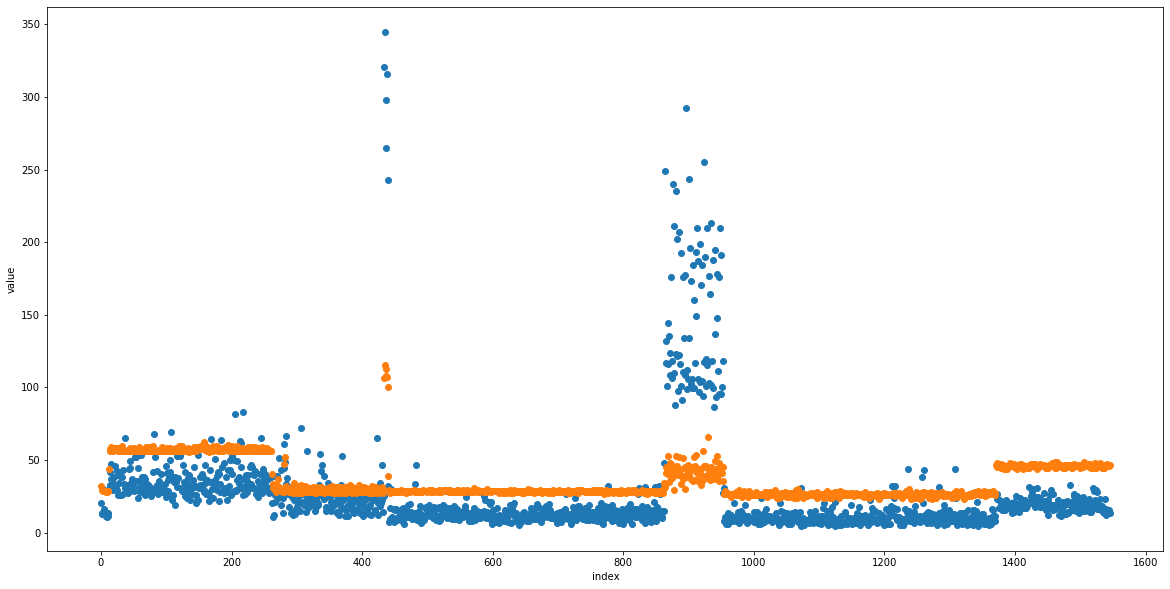

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(y.index, y.values)
plt.scatter(y_pred.index, y_pred.values)
plt.xlabel("index")
plt.ylabel("value")
plt.show()